# 因子モデルの因子分析

**因子分析**とは、$p$個の変数の変動メカニズムを少数の共通の要因によって単純化(縮約)するための分析手法である。共通の要因は**共通因子**と呼ばれる。  
$x_{ij}$を生徒iの問jの得点とする。ここでは、変数間の分布を調整するために、$x_{ij}$は問ごとに平均0、標準偏差1に標準化されているものとする。  
生徒$i$の共通因子の値を$f_i$と書くことにする。$f_i$は生徒$i$の**因子スコア**という。  
共通因子は各問の得点の情報を縮約したものなので、分析前の段階では何かは分からない。分析の過程で解釈が与えられる。  
いま、$f_1, f_2, ..., f_n \sim N(0,1), i.i.d$を仮定する。つまり、$E[f_i]=0, V[f_i]=1$である。  
$x_{ij}$が一つの共通因子$f_i$の関数として$x_{ij}=a_jf_i+d_ju_{ij}$のように定まることを想定したモデルを**1因子モデル**という。  
$a_j$は**因子負荷量**といい、共通因子と各問の関係を表す係数である。問ごとには異なるが、各生徒間では共通である。  
$d_iu_{ij}$は$x_{ij}$の変動のうち共通因子では説明できなかった部分である。  
$u_{ij}$は**独自性因子**という変数で、各$i$について$u_{i1}, u_{i2}, u_{ip} \sim N(0,1), i.i.d$を仮定する。  
また、$f_i$と$u_{ij}$は互いに独立であると仮定する。$d_j>0$は**独自係数**というパラメータで、$d_ju_{ij}$の標準偏差である。  
以上の仮定のもとで、$V[x_{ij}] = a_j^2+d_j^2 = 1$ となることがわかる。  
$a_j^2$は$x_ij$の変動のうちで共通因子で説明できた部分で、問$j$の**共通性**という。  
$d_j^2$は$x_{ij}$の変動のうちで共通因子で説明できなかった部分で、問$j$の**独自性**という。

In [20]:
# ワインデータで実践
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

wine = load_wine()

# データを標準化する
sc = StandardScaler()
sc.fit(wine.data)
X = sc.transform(wine.data)
X = pd.DataFrame(X, columns=wine.feature_names)

# 1因子モデルを実行
fa = FactorAnalyzer(n_factors=1, rotation=None)
fa.fit(X)

# 因子負荷量を算出
loadings_df = pd.DataFrame(data=fa.loadings_.transpose(), columns=X.columns)
loadings_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.262437,0.466352,-0.002497,0.447748,-0.256794,-0.854556,-0.951913,0.585547,-0.629636,0.168437,-0.583914,-0.798047,-0.553551


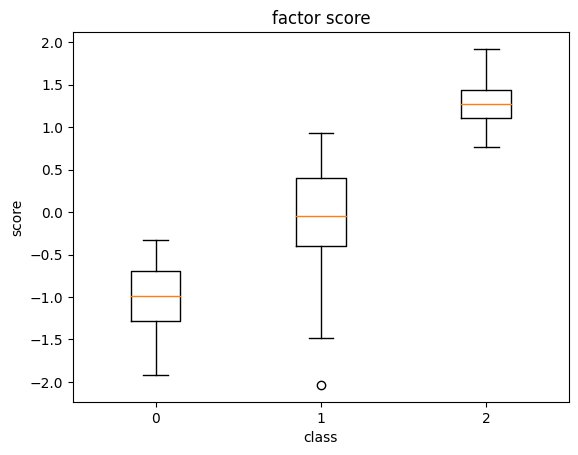

In [21]:
# クラスごとの因子スコアを箱ひげ図で表示
result_df = pd.DataFrame(fa.transform(X), columns=['factor1'])
result_df['class'] = wine.target

class0_df = result_df.loc[result_df['class']==0]["factor1"].tolist()
class1_df = result_df.loc[result_df['class']==1]["factor1"].tolist()
class2_df = result_df.loc[result_df['class']==2]["factor1"].tolist()

fig, ax = plt.subplots()
ax.boxplot([class0_df, class1_df, class2_df], labels=['0', '1', '2'])
ax.set_xlabel('class')
ax.set_ylabel('score')
plt.title("factor score")
plt.show()

# 多因子モデルの因子分析

これまでは共通因子は1つだと仮定してきたが、共通要因が2つ以上存在するモデルを考えることも可能である。  
一般に共通因子が$K$個のモデルは**K因子モデル**と呼ばれ、
$$
x_{ij} = a_{i1}f_{i1} + ... + a_{iK}f_{iK} + d_ju_{ij}
$$
と表される。$k$番目の因子を第$k$因子という。

In [22]:
# 先ほどのワインデータについて因子分析を因子数3つで実行
fa = FactorAnalyzer(n_factors=3, rotation=None) 
fa.fit(X)

# 因子負荷量
loadings_df = pd.DataFrame(data=fa.loadings_, columns=['factor1', 'factor2', 'factor3'] ,index=X.columns)
loadings_df

# factor1: フェノール関係の特徴量? Ex, total_phenols, flavanoids, od280/od315_of_diluted_wines
# factor2: アルコール度数と色の強さ? Ex, alcohol, color_intensity
# factor3: 灰 (?) に関する特徴量? Ex, ash, alcalinity_of_ash

,factor1,factor2,factor3
alcohol,0.303696,0.718459,-0.184135
malic_acid,-0.469445,0.278685,0.086192
ash,-0.000897,0.449071,0.651790
alcalinity_of_ash,-0.510072,-0.028359,0.699151
magnesium,0.263600,0.349077,0.091006
total_phenols,0.845208,0.094727,0.166563
flavanoids,0.938545,-0.012179,0.190408
nonflavanoid_phenols,-0.580890,0.044361,0.138686
proanthocyanins,0.618387,0.042691,0.122036
color_intensity,-0.185668,0.809678,-0.108117


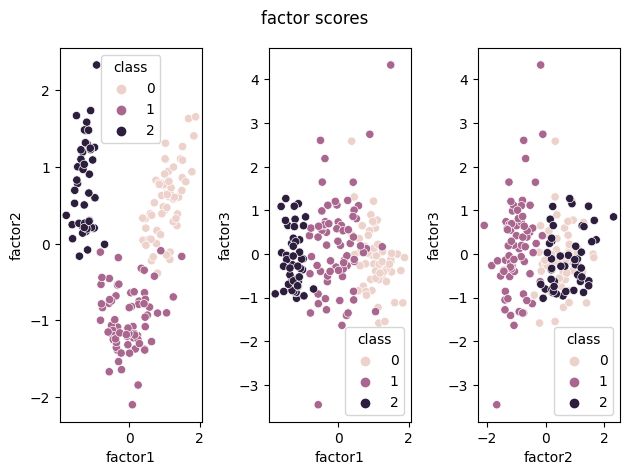

In [23]:
# 散布図で因子スコアを表示
result_df = pd.DataFrame(fa.transform(X), columns=['factor1', 'factor2', 'factor3'])
result_df['class'] = wine.target

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
sns.scatterplot(x='factor1', y='factor2', hue='class', data=result_df, ax=ax1)
sns.scatterplot(x='factor1', y='factor3', hue='class', data=result_df, ax=ax2)
sns.scatterplot(x='factor2', y='factor3', hue='class', data=result_df, ax=ax3)
fig.suptitle("factor scores")
plt.tight_layout()
plt.show()

共通性を確認することで、各変数の持つ情報が因子モデルにどれだけ反映されているかがわかる。  
共通性の小さい変数は因子モデルから削除して再度因子分析を行うとより良い結果を得ることができる。

In [24]:
# 共通性を確認
communalities_df = pd.DataFrame(data=fa.get_communalities(), columns=['communalities'] ,index=X.columns)
communalities_df

,communalities
alcohol,0.642321
malic_acid,0.305473
ash,0.626495
alcalinity_of_ash,0.749790
magnesium,0.199621
total_phenols,0.751092
flavanoids,0.917270
nonflavanoid_phenols,0.358634
proanthocyanins,0.399117
color_intensity,0.701741


いま$X,F,A,U,D$を
$$
X=(x_{ij}) {\scriptsize 1 \leq i \leq n, 1 \leq j\leq p} \quad F=(f_{ik}) {\scriptsize 1 \leq i \leq n, 1 \leq k \leq K}
$$
$$
A=(a_{jk}) {\scriptsize 1 \leq j \leq p, 1 \leq k \leq K} \quad U=(u_{ij}) {\scriptsize 1 \leq i \leq n,1 \leq j \leq p} \quad D=diag(d_1, ..., d_p)
$$
とするとき、$K$因子モデルは、$X = FA^T+UD$ と書くことができる。  
ここで、$T$を$TT^T$の対角成分が全て$1$であるような$K \times K$の正則行列とする。  
この時、$X = FA^T+UD = (FT)(T^(-1)A^T)+UD$が成立することがわかる。  
このことは上の条件を満たす任意のTを用いて、$\tilde{F}=FT$を因子スコア、$\tilde{A}=A(T^T)^{-1}$を因子負荷行列としてもよいことを表している。  
つまり、$K \geq 2$の時は、因子スコアと因子負荷行列の取り方は無数に存在する。
$$ 
f_{ik} ~ N(0,1), i=1, ..., n, k=1, ..., K
$$
$$
u_{ij} ~ N(0,1), i=1, ..., n, j=1, ..., p
$$
と仮定すれば、最尤推定法を用いることによって、ある$T$における$\tilde{A},\tilde{F}$と$D,U$の推定が可能である。  
この時の$\tilde{A},\tilde{F}の推定値を**初期解**という。  
$K$因子のモデル推定では、初期解から$T$を変化させて、分析結果の解釈を容易にするような$\tilde{A},\tilde{F}$の推定値を探索する。  
因子の解釈を容易にするような座標軸を探索する手続きを**回転**という。  
$T$を直交行列に限る場合の回転を**直交回転**という。  
直交回転の場合、各座標軸は互いに直交したままの回転となる。f_{i1}, ..., f_{iK}が互いに独立と仮定できる場合は直交回転を用いる。  
**バリマックス回転**は代表的な直交回転法で、因子負荷行列の各要素を2乗してできた$p \times K$行列の各列の分散を最大にするような直交回転と定義される。

In [25]:
# バリマックス回転を実行
fa_varimax = FactorAnalyzer(n_factors=3, rotation="varimax") # 因子数3つ
fa_varimax.fit(X)

# バリマックス回転の因子負荷行列
loadings_varimax_df = pd.DataFrame(data=fa_varimax.loadings_, columns=['factor1', 'factor2', 'factor3'] ,index=X.columns)
loadings_varimax_df

,factor1,factor2,factor3
alcohol,0.035312,0.797974,-0.065666
malic_acid,-0.494937,0.093006,0.227728
ash,0.025898,0.312247,0.726860
alcalinity_of_ash,-0.300980,-0.305777,0.752131
magnesium,0.167642,0.396137,0.120802
total_phenols,0.798142,0.336009,0.034061
flavanoids,0.920812,0.262887,0.016319
nonflavanoid_phenols,-0.519761,-0.170054,0.244057
proanthocyanins,0.591530,0.221014,0.019025
color_intensity,-0.427445,0.711506,0.113094


In [26]:
# バリマックス回転時の共通性
communalities_varimax_df = pd.DataFrame(data=fa_varimax.get_communalities(), columns=['communalities'] ,index=X.columns)
communalities_varimax_df

,communalities
alcohol,0.642321
malic_acid,0.305473
ash,0.626495
alcalinity_of_ash,0.749790
magnesium,0.199621
total_phenols,0.751092
flavanoids,0.917270
nonflavanoid_phenols,0.358634
proanthocyanins,0.399117
color_intensity,0.701741


直交回転以外の回転を**斜交回転**という。プロマックス回転が有名である

In [27]:
# プロマックス回転を実行
fa_promax = FactorAnalyzer(n_factors=3, rotation="promax") # 因子数3つ
fa_promax.fit(X)

# プロマックス回転の因子負荷行列
loadings_promax_df = pd.DataFrame(data=fa_promax.loadings_, columns=['factor1', 'factor2', 'factor3'] ,index=X.columns)
loadings_promax_df

,factor1,factor2,factor3
alcohol,-0.084919,0.828240,-0.123595
malic_acid,-0.491256,0.134425,0.164368
ash,0.122195,0.220916,0.743625
alcalinity_of_ash,-0.132584,-0.375304,0.771409
magnesium,0.145143,0.369529,0.120326
total_phenols,0.801492,0.231137,0.120158
flavanoids,0.937470,0.140878,0.123795
nonflavanoid_phenols,-0.478164,-0.136055,0.197719
proanthocyanins,0.596685,0.143204,0.084610
color_intensity,-0.526873,0.779382,0.007136


In [28]:
# プロマックス回転時の共通性
communalities_promax_df = pd.DataFrame(data=fa_promax.get_communalities(), columns=['communalities'] ,index=X.columns)
communalities_promax_df

,communalities
alcohol,0.708468
malic_acid,0.286419
ash,0.616714
alcalinity_of_ash,0.753503
magnesium,0.172097
total_phenols,0.710252
flavanoids,0.914022
nonflavanoid_phenols,0.286245
proanthocyanins,0.383699
color_intensity,0.885082


$K$因子モデルの場合も、$d_j^2$を変数$j$の独自性という。一方、共通性は$1-d_j^2$により定義される。  
$f_{i1}, ..., f_{iK}$が互いに独立と仮定できる場合(直行回転を用いる場合)、共通性は$a_{ji}^2 + ... + a_{jK}^2 $となる。

# 構造方程式

因子分析のパス図のように、頂点と辺からなる図を**グラフ**という。  
$V$を頂点の集合、$E$を辺の集合とするときに、グラフ$G$は $G = (V, E)$のように表される。  
全ての辺が矢線のグラフを**有向グラフ**という。一般に有効グラフが定義するモデルを**構造方程式モデル**という。  
因子分析は構造方程式モデルの一種と考えることができる。変数$X_1, X_2, X_3$は平均0、標準偏差1に標準化されているものとする。  
この3変数間の構造方程式を以下のように定義する。
$$
X_2 = aX_1+u, \quad X_3 = bX_2+v
$$
ここで、$u,v$は誤差項で、$u$は$X_1$と、$v$は$X_1,X_2$とそれぞれ無相関と仮定する。  
回帰係数$a,b$は**パス係数**とも呼ばれる。これらは未知パラメータなので推定をする必要がある。  
$ρ_{12}$を$X_1,X_2$の共分散、$ρ_{23}$を$X_2,X_3$の共分散とする。  
上記の第一式に$X_1$、第二式に$X_2$を掛けて期待値をとれば、$a=ρ_{12}, b=ρ_{23}$を得る。  
したがって、$a$は$X_1$と$X_2$の標本共分散で、$b$は$X_2$と$X_3$の標本共分散でそれぞれ推定が可能である。  
この手続きは最小二乗法と等価である。  
このように、構造方程式の両辺に変数を掛けて期待値を取ることによりパラメータ推定を行う方法を**操作変数法**という。  
両辺に掛ける変数は**操作変数**という。

In [29]:
import semopy as sem
from semopy import Model
from semopy.examples import political_democracy

# semopyで用意されているデータセットを使用。データの内訳は以下の通り
# y1	報道の自由の専門家評価 (1960)
# y2	野党の自由 (1960)
# y3	選挙の公平性 (1960)
# y4	選出された議会の有効性 (1960)
# y5	報道の自由の専門家評価 (1965)
# y6	野党の自由 (1965)
# y7	選挙の公平性 (1965)
# y8	選出された議会の有効性 (1965)
# x1	一人当たりGNP (1960)
# x2	一人当たり
# x3	産業における労働力の割合(%) (1960)
data = political_democracy.get_data()
data.head()

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679


In [30]:
# 仮説モデルを取得。モデルの概要は以下の通り
# y1~y4 ... 1960年の民主主義に関する観測変数 --> dem60
# y5~y8 ... 1965年の民主主義に関する観測変数 --> dem65
# x1~x3 ... 1960年の各種産業指数 --> ind60
desc = political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [31]:
# 学習を実行
mod = Model(desc)
res = mod.fit(data)

# 学習結果のパラメータ一覧を表示する
inspect = mod.inspect()
inspect

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,dem60,~,ind60,1.482379,0.399024,3.715017,0.000203
1,dem65,~,ind60,0.571912,0.221383,2.583364,0.009784
2,dem65,~,dem60,0.837574,0.098446,8.507992,0.0
3,x1,~,ind60,1.000000,-,-,-
4,x2,~,ind60,2.180494,0.138565,15.736254,0.0
5,x3,~,ind60,1.818546,0.151993,11.96465,0.0
6,y1,~,dem60,1.000000,-,-,-
7,y2,~,dem60,1.256819,0.182687,6.879647,0.0
8,y3,~,dem60,1.058174,0.151521,6.983699,0.0
9,y4,~,dem60,1.265186,0.145151,8.716344,0.0


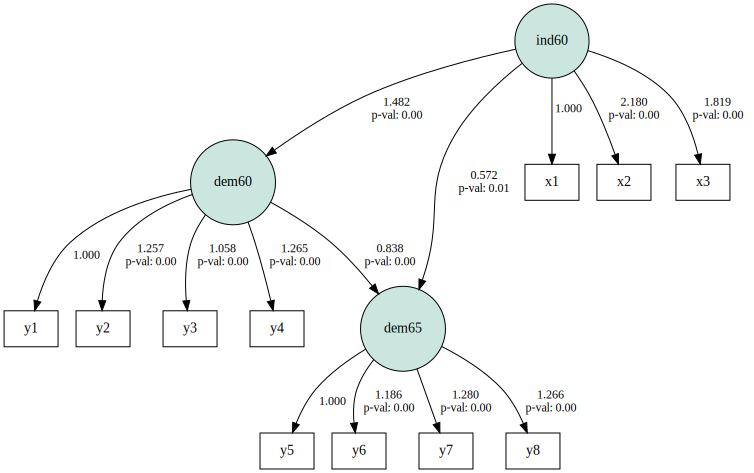

In [32]:
# パス図を描画・保存
sem.semplot(mod, "images/25_sem_graph.png")

In [33]:
# 各種適合度を確認する
stats = sem.calc_stats(mod)
stats.T

,Value
DoF,35.000000
DoF Baseline,55.000000
chi2,38.125446
chi2 p-value,0.329171
chi2 Baseline,730.654577
CFI,0.995374
GFI,0.947820
AGFI,0.918003
NFI,0.947820
TLI,0.992731


# グラフィカルモデル

全ての辺が無向辺であるようなグラフを**無向グラフ**という。  
$(X_1, ..., X_d)$を多変量正規分布$N(0,Σ)$に従う確率ベクトル、$G=(V,E)$を頂点集合$V={X_1, ..., X_d}$を持つ無向グラフとする。  
グラフ$G$上で、$X_i,X_j$間に辺がなければ、$X_i$と$X_j$がそれ以外の確率変数で条件付けた時に条件付き独立とするモデルを**グラフィカルモデル**という。  
つまり、グラフィカルモデルとは変数間の条件付き独立の関係を無向グラフで表現したモデルであると言える。  
また、$Σ^{-1} = (σ^{ij}) \scriptsize {1 \leq i \leq d, 1 \leq j \leq d}$とするとグラフ$G$上で辺のない2頂点$v_i$と$v_j$に対して$σ^{ij}=0$を満たすモデルとも言える。